In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=CSV.csv=original file from CFS 
df5=Intrastate starts here
df6=Interstate data starts here
Inter_w_dummy=To save time start from here for INTERSTATE

In [ ]:
df=pd.read_csv("CSV.csv")
df.head()

In [3]:
df2=df.drop(['ORIG_MA','DEST_MA','SHIPMT_DIST_GC','SCTG','EXPORT_YN','EXPORT_CNTRY','WGT_FACTOR'],axis=1)
df2.head()

,SHIPMT_ID,ORIG_STATE,ORIG_CFS_AREA,DEST_STATE,DEST_CFS_AREA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT
0,1,6,06-99999,6,06-260,326,4,5,4380,391,60,N,N
1,2,49,49-482,47,47-314,4541,3,14,56,4,1810,N,N
2,3,6,06-348,6,06-348,4231,4,5,255,440,5,N,N
3,4,6,06-260,6,06-99999,212,4,5,250,44912,35,N,N
4,5,45,45-273,45,45-273,45431,4,5,46,73,11,N,H


In [4]:
df_area=pd.read_csv("CFSArea.csv")
df_area.dropna(how='any',inplace=True)
df_area

,CFS_AREA,Description
0,36-104,NY CFS
1,13-122,GA CFS
2,01-142,AL CFS
3,25-148,MA-RI-NH-CT CFS
4,33-148,MA-RI-NH-CT CFS
...,...,...
127,51-99999,VirginiaRFS
128,53-99999,WashingtonRFS
129,54-99999,VirginiaRFS
130,55-99999,WisconsinRFS


In [5]:
df3=df2.merge(df_area,left_on="ORIG_CFS_AREA",right_on=['CFS_AREA'])
df3.head()

,SHIPMT_ID,ORIG_STATE,ORIG_CFS_AREA,DEST_STATE,DEST_CFS_AREA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,CFS_AREA,Description
0,1,6,06-99999,6,06-260,326,4,5,4380,391,60,N,N,06-99999,CaliforniaRFS
1,107,6,06-99999,6,06-99999,4235,4,4,91,41,3,N,N,06-99999,CaliforniaRFS
2,129,6,06-99999,6,06-488,4931,1,5,57362,35622,120,Y,N,06-99999,CaliforniaRFS
3,223,6,06-99999,6,06-348,323,1,14,673,35,162,N,N,06-99999,CaliforniaRFS
4,572,6,06-99999,6,06-488,311,2,5,757,683,37,Y,N,06-99999,CaliforniaRFS


In [6]:
df3.drop(['CFS_AREA'],axis=1,inplace=True)
df3['ORIG']=df3['Description']
df3.drop(['Description'],axis=1,inplace=True)
df3.head()

,SHIPMT_ID,ORIG_STATE,ORIG_CFS_AREA,DEST_STATE,DEST_CFS_AREA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,ORIG
0,1,6,06-99999,6,06-260,326,4,5,4380,391,60,N,N,CaliforniaRFS
1,107,6,06-99999,6,06-99999,4235,4,4,91,41,3,N,N,CaliforniaRFS
2,129,6,06-99999,6,06-488,4931,1,5,57362,35622,120,Y,N,CaliforniaRFS
3,223,6,06-99999,6,06-348,323,1,14,673,35,162,N,N,CaliforniaRFS
4,572,6,06-99999,6,06-488,311,2,5,757,683,37,Y,N,CaliforniaRFS


In [7]:
df4=df3.merge(df_area,left_on="DEST_CFS_AREA",right_on=['CFS_AREA'])
df4.head()

,SHIPMT_ID,ORIG_STATE,ORIG_CFS_AREA,DEST_STATE,DEST_CFS_AREA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,ORIG,CFS_AREA,Description
0,1,6,06-99999,6,06-260,326,4,5,4380,391,60,N,N,CaliforniaRFS,06-260,CA CFS
1,9376,6,06-99999,6,06-260,212,3,4,451,45189,109,N,N,CaliforniaRFS,06-260,CA CFS
2,9491,6,06-99999,6,06-260,4931,1,5,16687,33374,70,Y,N,CaliforniaRFS,06-260,CA CFS
3,21050,6,06-99999,6,06-260,4244,2,5,2177,2215,143,Y,N,CaliforniaRFS,06-260,CA CFS
4,22054,6,06-99999,6,06-260,311,4,4,32231,37919,35,N,N,CaliforniaRFS,06-260,CA CFS


In [8]:
df4.drop(['CFS_AREA'],axis=1,inplace=True)
df4['DEST']=df4['Description']
df4.drop(['Description'],axis=1,inplace=True)
df4.head()

,SHIPMT_ID,ORIG_STATE,ORIG_CFS_AREA,DEST_STATE,DEST_CFS_AREA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,ORIG,DEST
0,1,6,06-99999,6,06-260,326,4,5,4380,391,60,N,N,CaliforniaRFS,CA CFS
1,9376,6,06-99999,6,06-260,212,3,4,451,45189,109,N,N,CaliforniaRFS,CA CFS
2,9491,6,06-99999,6,06-260,4931,1,5,16687,33374,70,Y,N,CaliforniaRFS,CA CFS
3,21050,6,06-99999,6,06-260,4244,2,5,2177,2215,143,Y,N,CaliforniaRFS,CA CFS
4,22054,6,06-99999,6,06-260,311,4,4,32231,37919,35,N,N,CaliforniaRFS,CA CFS


In [9]:
df5=df4[df4['ORIG_STATE']==df4['DEST_STATE']] #df5=Intrastate
df5.head()

,SHIPMT_ID,ORIG_STATE,ORIG_CFS_AREA,DEST_STATE,DEST_CFS_AREA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,ORIG,DEST
0,1,6,06-99999,6,06-260,326,4,5,4380,391,60,N,N,CaliforniaRFS,CA CFS
1,9376,6,06-99999,6,06-260,212,3,4,451,45189,109,N,N,CaliforniaRFS,CA CFS
2,9491,6,06-99999,6,06-260,4931,1,5,16687,33374,70,Y,N,CaliforniaRFS,CA CFS
3,21050,6,06-99999,6,06-260,4244,2,5,2177,2215,143,Y,N,CaliforniaRFS,CA CFS
4,22054,6,06-99999,6,06-260,311,4,4,32231,37919,35,N,N,CaliforniaRFS,CA CFS


In [10]:
df6=df4[df4['ORIG_STATE']!=df4['DEST_STATE']] #df6=Interstate
df6.head()

,SHIPMT_ID,ORIG_STATE,ORIG_CFS_AREA,DEST_STATE,DEST_CFS_AREA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,ORIG,DEST
1607,5653,49,49-482,6,06-260,332,3,4,22110,1002,813,N,N,UT CFS,CA CFS
1608,14414,49,49-482,6,06-260,4541,3,14,14,1,808,N,N,UT CFS,CA CFS
1609,217289,49,49-482,6,06-260,311,3,4,9593,10098,847,N,N,UT CFS,CA CFS
1610,256847,49,49-482,6,06-260,212,1,15,64031,215418,984,N,N,UT CFS,CA CFS
1611,291966,49,49-482,6,06-260,322,1,4,6642,4396,803,N,N,UT CFS,CA CFS


In [11]:
# def find_outliers(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outlier_ind=list(x.index[(x<lower)|(x>upper)])
    outlier_value=list(x[outlier_ind])
    return outlier_ind,outlier_value

IndentationError: unexpected indent (<ipython-input-11-05e4cc46f850>, line 2)

In [ ]:
find_outliers(df6['SHIPMT_VALUE'])[0]
df6=df6.drop(find_outliers(df6['SHIPMT_VALUE'])[0],axis=0)
df6=df6.drop(find_outliers(df6['SHIPMT_WGHT'])[0],axis=0)
df6=df6.drop(find_outliers(df6['SHIPMT_DIST_ROUTED'])[0],axis=0)
df6=df6[df6['MODE']!=0]
df6

In [ ]:
df6.to_csv("interstate.csv")

In [ ]:
inter_df=pd.read_csv("interstate.csv")

inter_df['MODE'].value_counts()

inter_df.NAICS=inter_df.NAICS.astype(str)
inter_df.QUARTER=inter_df.QUARTER.astype(str)
inter_df.MODE=inter_df.MODE.astype(str)

inter_df=inter_df[inter_df['MODE']!="2"]

inter_df=inter_df[inter_df['MODE']!="12"]

inter_df['Truck']=inter_df.apply(lambda r:1 if (r.MODE=="3" or r.MODE=="4" or r.MODE=="5") else 0,axis=1)
inter_df['Rail']=inter_df.apply(lambda r:1 if (r.MODE=="6") else 0,axis=1)
inter_df['Water']=inter_df.apply(lambda r:1 if (r.MODE=="10") else 0,axis=1)
inter_df['Air']=inter_df.apply(lambda r:1 if (r.MODE=="11") else 0,axis=1)
inter_df['Multimode']=inter_df.apply(lambda r:1 if (r.MODE=="13" or r.MODE=="14" or  r.MODE=="15" or r.MODE=="16" or r.MODE=="17" or
                                                 r.MODE=="18" or r.MODE=="20") else 0,axis=1)

inter_df['NAICS(Mining)']=inter_df.apply(lambda r:1 if r.NAICS=="212" else 0,axis=1)

inter_df['NAICS(Manufac.)']=inter_df.apply(lambda r:1 if (r.NAICS[0]=="3" and r.NAICS[1]=="1") or
                                         (r.NAICS[0]=="3" and r.NAICS[1]=="2") or
                                         (r.NAICS[0]=="3" and r.NAICS[1]=="3") else 0,axis=1)

inter_df['NAICS(Whlsale)']=inter_df.apply(lambda r:1 if (r.NAICS[0]=="4" and r.NAICS[1]=="2") else 0,axis=1)

inter_df['NAICS(Retl_trade)']=inter_df.apply(lambda r:1 if (r.NAICS[0]=="4" and r.NAICS[1]=="5") else 0,axis=1)
inter_df['NAICS(Transprt_wrehous)']=inter_df.apply(lambda r:1 if (r.NAICS[0]=="4" and r.NAICS[1]=="9") else 0,axis=1)
inter_df['NAICS(Informatn)']=inter_df.apply(lambda r:1 if (r.NAICS[0]=="5" and r.NAICS[1]=="1") else 0,axis=1)
inter_df['NAICS(Pro_sci_tech_servc)']=inter_df.apply(lambda r:1 if (r.NAICS[0]=="5" and r.NAICS[1]=="5") else 0,axis=1)

inter_df['first3months']=inter_df.apply(lambda r:1 if r.QUARTER[0]=="1" else 0,axis=1)
inter_df['second3months']=inter_df.apply(lambda r:1 if r.QUARTER[0]=="2" else 0,axis=1)
inter_df['third3months']=inter_df.apply(lambda r:1 if r.QUARTER[0]=="3" else 0,axis=1)
inter_df['last3months)']=inter_df.apply(lambda r:1 if r.QUARTER[0]=="4" else 0,axis=1)


inter_df['Temp_contrl']=inter_df.apply(lambda r:1 if r.TEMP_CNTL_YN=="Y" else 0, axis=1) 
inter_df['Hazard']=inter_df.apply(lambda r:1 if (r.HAZMAT=="P" or r.HAZMAT=="H") else 0, axis=1)

inter_df.to_csv("Inter_w_dummy.csv")

In [2]:
Inter_w_dummy=pd.read_csv("Inter_w_dummy.csv")

In [13]:
Inter_w_dummy.head()

,Unnamed: 0,Unnamed: 0.1,SHIPMT_ID,ORIG_STATE,ORIG_CFS_AREA,DEST_STATE,DEST_CFS_AREA,NAICS,QUARTER,MODE,...,NAICS(Retl_trade),NAICS(Transprt_wrehous),NAICS(Informatn),NAICS(Pro_sci_tech_servc),first3months,second3months,third3months,last3months),Temp_contrl,Hazard
0,0,1608,14414,49,49-482,6,06-260,4541,3,14,...,1,0,0,0,0,0,1,0,0,0
1,1,1612,372691,49,49-482,6,06-260,4541,2,14,...,1,0,0,0,0,1,0,0,0,0
2,2,1613,503095,49,49-482,6,06-260,4239,1,14,...,0,0,0,0,1,0,0,0,0,0
3,3,1615,536606,49,49-482,6,06-260,4541,4,14,...,1,0,0,0,0,0,0,1,0,0
4,4,1617,619266,49,49-482,6,06-260,339,1,14,...,0,0,0,0,1,0,0,0,0,0


In [14]:
#just random checking of interstate data
Inter_w_dummy.loc[[143904],"ORIG":"DEST"]

,ORIG,DEST
143904,CA CFS,FloridaRFS


In [17]:
Inter_w_dummy_ORIG=Inter_w_dummy['ORIG'].value_counts()
Inter_w_dummy_ORIG_df = pd.DataFrame(Inter_w_dummy_ORIG)
Inter_w_dummy_ORIG_df = Inter_w_dummy_ORIG_df.reset_index()
Inter_w_dummy_ORIG_df.columns = ['Origin states','#shipments_ORIGIN']

Inter_w_dummy_DEST=Inter_w_dummy['DEST'].value_counts()
Inter_w_dummy_DEST_df = pd.DataFrame(Inter_w_dummy_DEST)
Inter_w_dummy_DEST_df = Inter_w_dummy_DEST_df.reset_index()
Inter_w_dummy_DEST_df.columns = ['Destination states','#shipments_DEST']

Inter_w_dummy_OD_df = pd.concat([Inter_w_dummy_ORIG_df, Inter_w_dummy_DEST_df], axis=1)

In [18]:
Inter_w_dummy_OD_df

,Origin states,#shipments_ORIGIN,Destination states,#shipments_DEST
0,NY-NJ-CT-PA CFS,132375,NY-NJ-CT-PA CFS,136924
1,CA CFS,112196,CA CFS,112748
2,IL-IN-WI CFS,75797,IL-IN-WI CFS,70785
3,OH CFS,60291,MI CFS,50393
4,PA-NJ-DE-MD CFS,48093,FL CFS,48803
...,...,...,...,...
93,LA CFS,1046,DelawareRFS,2221
94,HI MFS,535,LA CFS,1627
95,AlaskaRFS,415,AlaskaRFS,1620
96,TX MFS,309,HI MFS,789


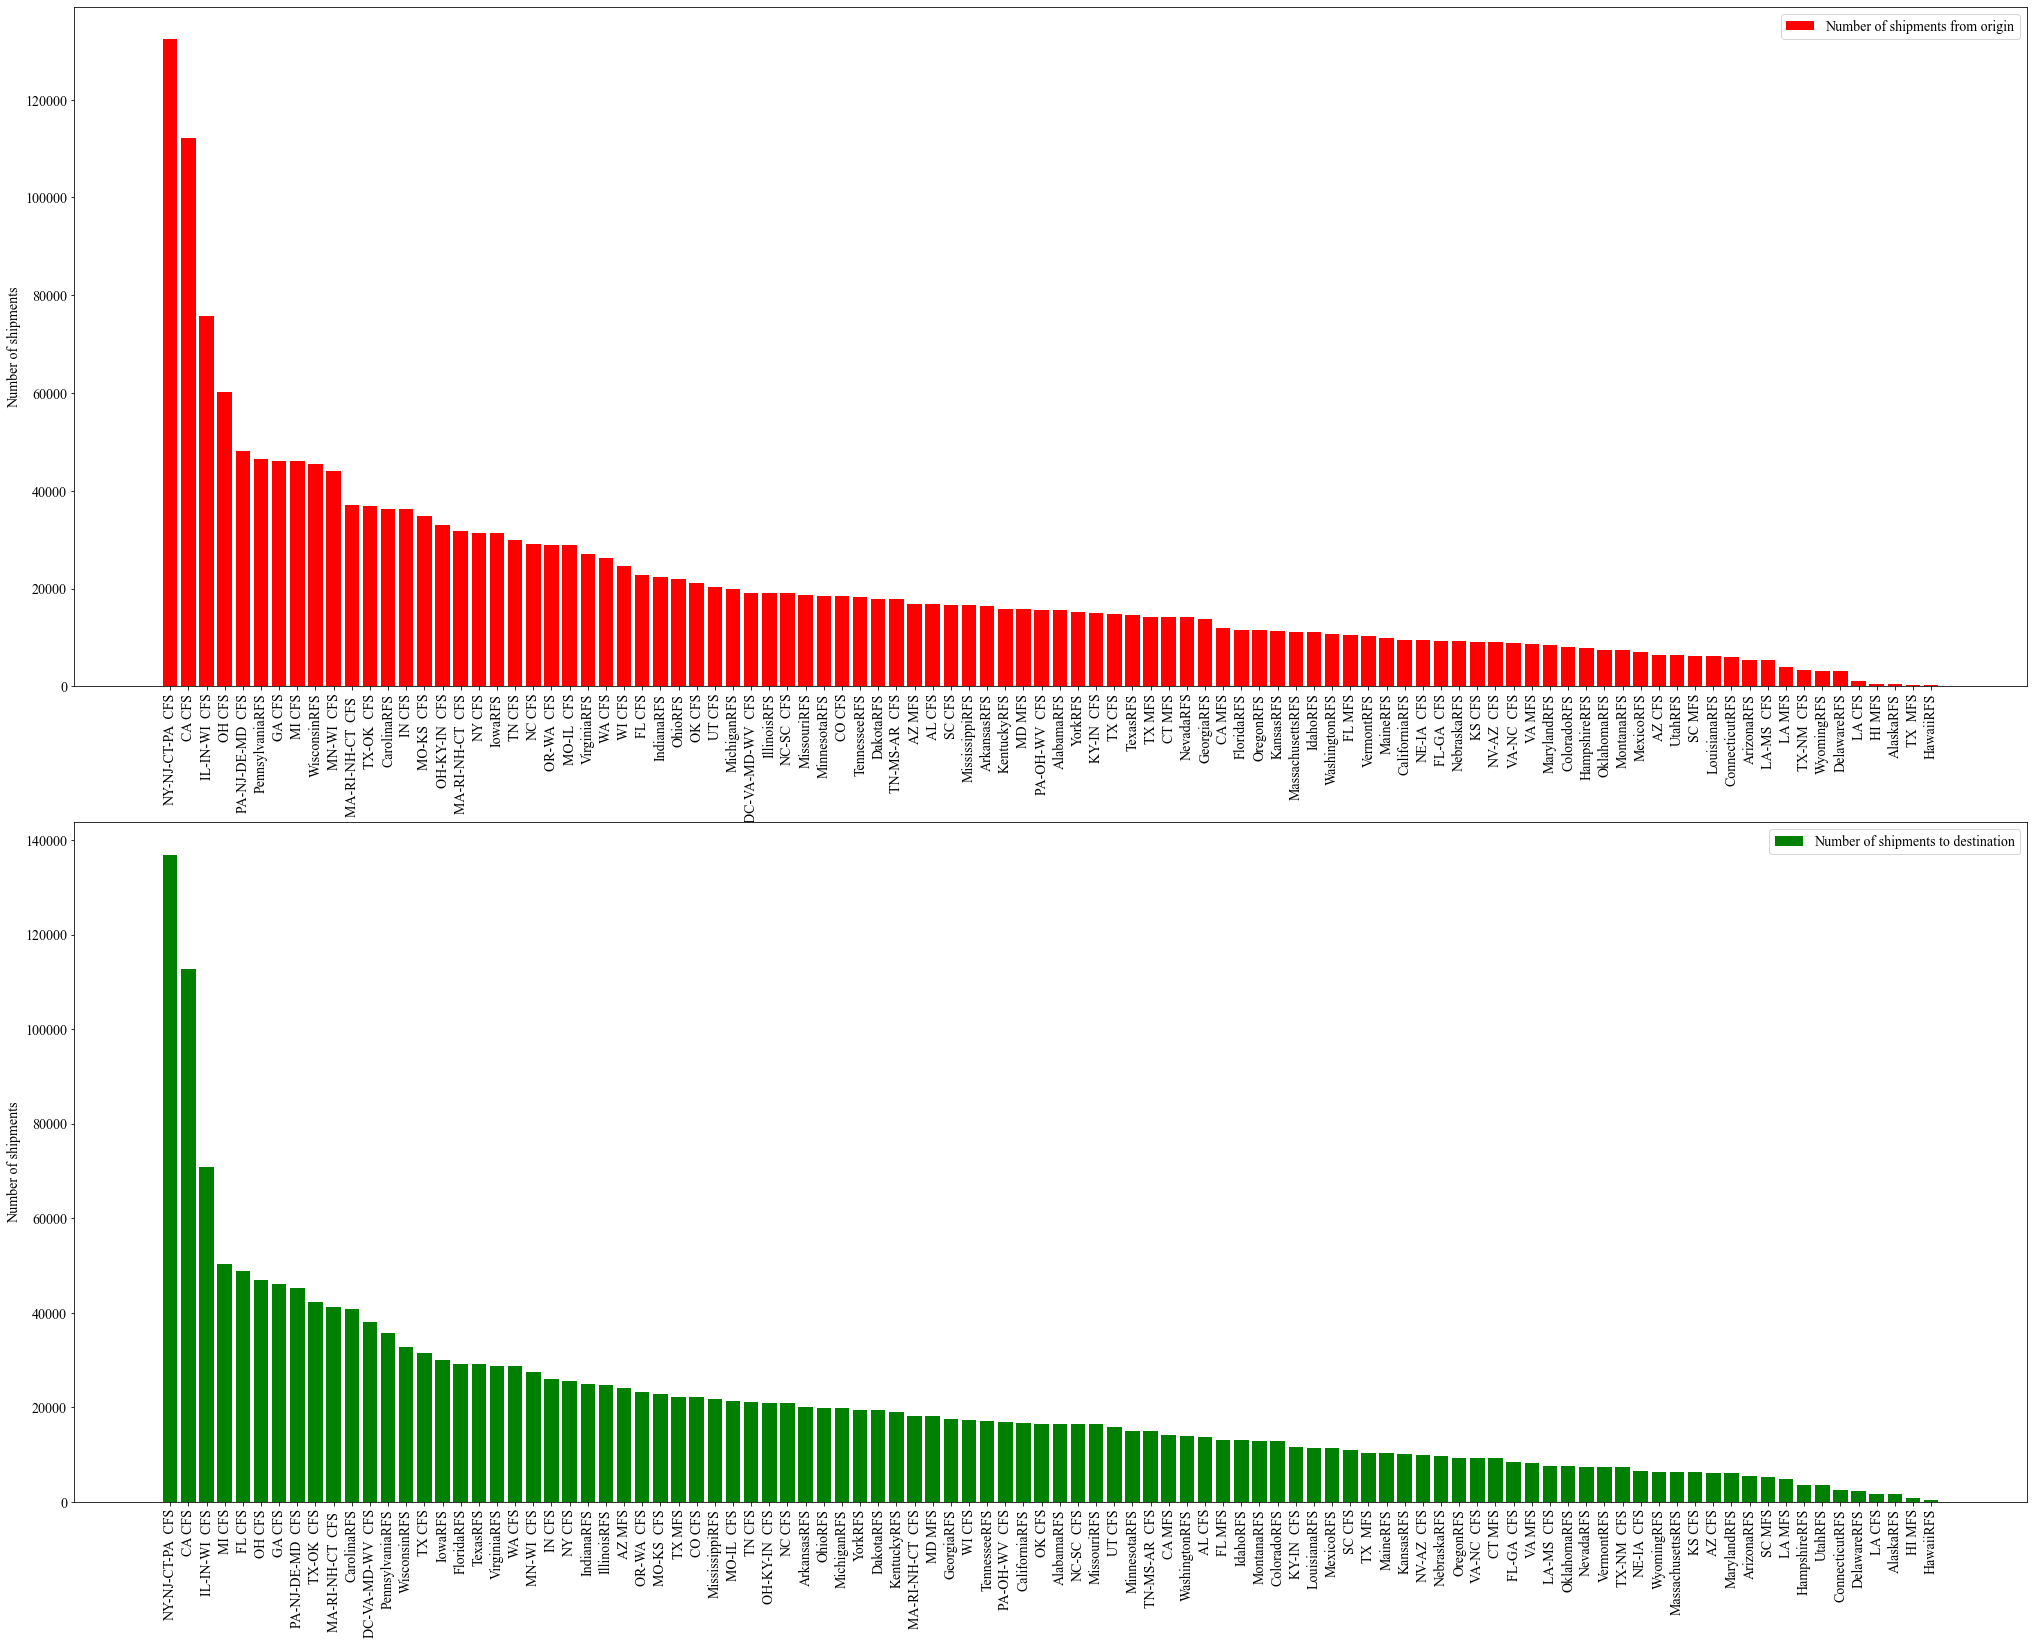

In [19]:
#plot no. of shipment vs Origin,Destination
plt.figure(figsize=(35,27.5))
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.subplot(2,1,1)

fig_top=plt.bar(Inter_w_dummy_OD_df['Origin states'],Inter_w_dummy_OD_df['#shipments_ORIGIN'],label="Origin",color="red")
plt.xticks(rotation="vertical")
plt.xticks(rotation="vertical")
plt.ylabel("Number of shipments")
plt.legend([fig_top],['Number of shipments from origin'],fontsize=14)

plt.subplot(2,1,2)
fig_bot=plt.bar(Inter_w_dummy_OD_df['Destination states'],Inter_w_dummy_OD_df['#shipments_DEST'],label="Destination",color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Number of shipments")
plt.legend([fig_bot],['Number of shipments to destination'],fontsize=14)

plt.savefig("Interstate_#shipments.png")
plt.show()

In [21]:
#correlation matrix
import seaborn as sns
Inter_w_dummy_corr_data =Inter_w_dummy.iloc[:,[10,11,12,23,24,25,26,27,28,29,30,31,32,33,17,18,19,20,21,22]]
Inter_w_dummy_cor_mat=Inter_w_dummy_corr_data.corr()
Inter_w_dummy_cor_mat

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,NAICS(Manufac.),NAICS(Whlsale),NAICS(Retl_trade),NAICS(Transprt_wrehous),NAICS(Informatn),NAICS(Pro_sci_tech_servc),first3months,second3months,third3months,last3months),Temp_contrl,Truck,Rail,Water,Air,Multimode,NAICS(Mining)
SHIPMT_VALUE,1.000,0.402,0.019,0.167,-0.092,-0.103,-0.037,-0.042,0.000,0.000,0.001,0.000,-0.001,0.037,0.241,0.001,-0.000,0.073,-0.263,0.005
SHIPMT_WGHT,0.402,1.000,-0.130,0.111,-0.032,-0.108,-0.031,-0.040,-0.011,-0.004,0.001,0.004,-0.001,0.158,0.524,0.010,0.008,-0.044,-0.503,0.017
SHIPMT_DIST_ROUTED,0.019,-0.130,1.000,0.082,-0.115,0.070,-0.026,0.011,0.003,0.005,0.000,-0.001,-0.004,-0.083,-0.220,0.000,0.012,0.103,0.182,-0.004
NAICS(Manufac.),0.167,0.111,0.082,1.000,-0.744,-0.274,-0.219,-0.114,-0.102,0.002,0.003,-0.000,-0.005,-0.057,0.074,0.000,-0.006,0.051,-0.090,-0.015
NAICS(Whlsale),-0.092,-0.032,-0.115,-0.744,1.000,-0.212,-0.170,-0.088,-0.079,-0.003,-0.001,0.001,0.004,0.080,0.037,0.001,0.008,-0.035,-0.025,-0.011
NAICS(Retl_trade),-0.103,-0.108,0.070,-0.274,-0.212,1.000,-0.063,-0.033,-0.029,0.002,-0.002,-0.002,0.002,-0.019,-0.169,-0.001,-0.002,-0.026,0.176,-0.004
NAICS(Transprt_wrehous),-0.037,-0.031,-0.026,-0.219,-0.170,-0.063,1.000,-0.026,-0.023,0.001,-0.001,0.001,-0.000,-0.012,-0.022,-0.001,-0.001,-0.002,0.022,-0.003
NAICS(Informatn),-0.042,-0.040,0.011,-0.114,-0.088,-0.033,-0.026,1.000,-0.012,-0.001,-0.000,0.000,0.000,-0.024,-0.054,-0.000,-0.001,-0.016,0.059,-0.002
NAICS(Pro_sci_tech_servc),0.000,-0.011,0.003,-0.102,-0.079,-0.029,-0.023,-0.012,1.000,-0.000,-0.001,-0.001,0.003,0.004,-0.003,-0.000,-0.001,0.004,0.001,-0.002
first3months,0.000,-0.004,0.005,0.002,-0.003,0.002,0.001,-0.001,-0.000,1.000,-0.357,-0.346,-0.323,-0.003,-0.008,-0.001,0.002,-0.002,0.009,0.000


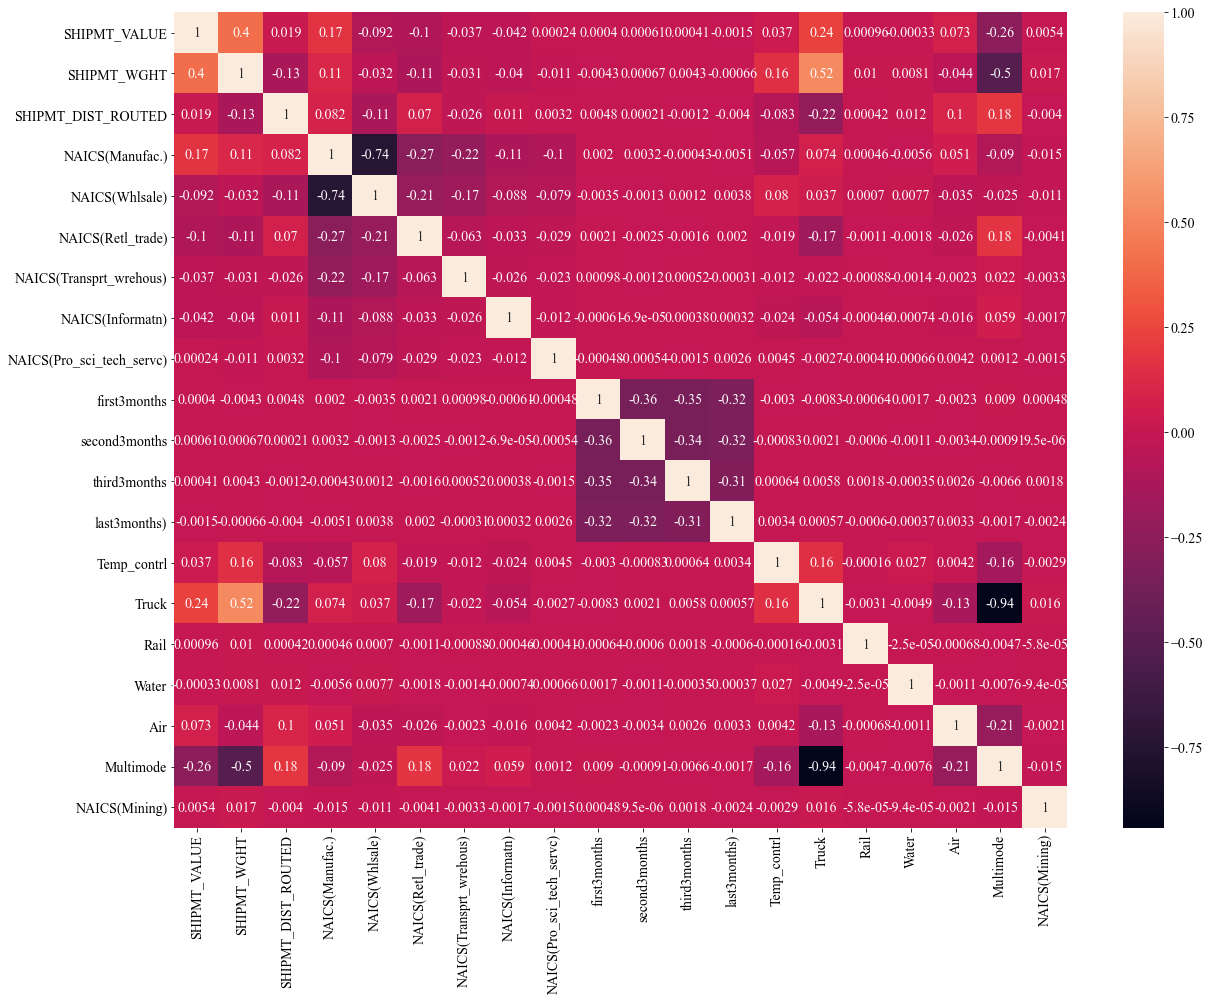

In [22]:
#correlation matrix heatmap
pd.set_option('display.float_format', lambda x: '%.3f' % x)
fig, ax = plt.subplots(figsize=(20,15)) 
correlation_matrix_image=sns.heatmap(Inter_w_dummy_cor_mat,annot = True)
#correlation_matrix_image.savefig("correlation_matrix_image-interstate.png")

In [24]:
def numericfeature_per_mode(x,y):
    sumvalue=(x*y).sum()
    return sumvalue

In [25]:
SV_T=numericfeature_per_mode(Inter_w_dummy['SHIPMT_VALUE'],Inter_w_dummy['Truck'])
SV_R=numericfeature_per_mode(Inter_w_dummy['SHIPMT_VALUE'],Inter_w_dummy['Rail'])
SV_W=numericfeature_per_mode(Inter_w_dummy['SHIPMT_VALUE'],Inter_w_dummy['Water'])
SV_A=numericfeature_per_mode(Inter_w_dummy['SHIPMT_VALUE'],Inter_w_dummy['Air'])
SV_M=numericfeature_per_mode(Inter_w_dummy['SHIPMT_VALUE'],Inter_w_dummy['Multimode'])

<ipython-input-26-c0e6a158c996>:19: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),


Text(0.5, 1.0, 'Percentage of shipment value for different modes')

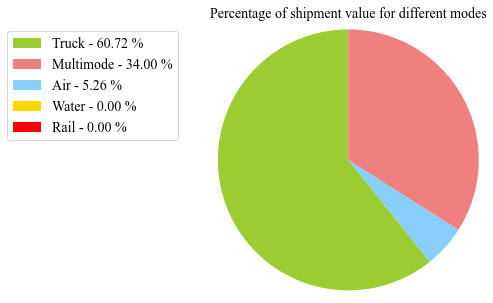

In [26]:
#pieplot for shipment value for modes
rcParams['font.family'] = 'Times New Roman'
x = np.char.array(['Truck', 'Rail', 'Water', 'Air', 'Multimode'])
y = np.array([SV_T, SV_R, SV_W,SV_A,SV_M])
colors = ['yellowgreen','red','gold','lightskyblue','lightcoral']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
fig = plt.gcf()
fig.set_size_inches(5, 5)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)


plt.title("Percentage of shipment value for different modes",fontsize=14)


In [27]:
SW_T=numericfeature_per_mode(Inter_w_dummy['SHIPMT_WGHT'],Inter_w_dummy['Truck'])
SW_R=numericfeature_per_mode(Inter_w_dummy['SHIPMT_WGHT'],Inter_w_dummy['Rail'])
SW_W=numericfeature_per_mode(Inter_w_dummy['SHIPMT_WGHT'],Inter_w_dummy['Water'])
SW_A=numericfeature_per_mode(Inter_w_dummy['SHIPMT_WGHT'],Inter_w_dummy['Air'])
SW_M=numericfeature_per_mode(Inter_w_dummy['SHIPMT_WGHT'],Inter_w_dummy['Multimode'])

<ipython-input-28-9c5d54d910a4>:20: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),


Text(0.5, 1.0, 'Percentage of shipment weight for different modes')

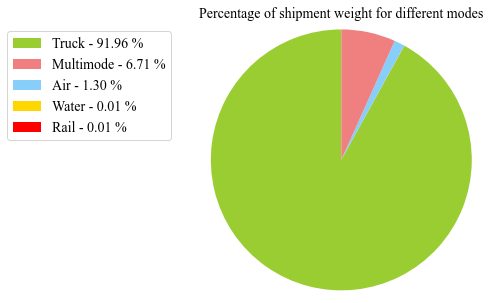

In [28]:
#pieplot for shipment weight for modes
rcParams['font.family'] = 'Times New Roman'

x = np.char.array(['Truck', 'Rail', 'Water', 'Air', 'Multimode'])
y = np.array([SW_T, SW_R, SW_W,SW_A,SW_M])
colors = ['yellowgreen','red','gold','lightskyblue','lightcoral']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
fig = plt.gcf()
fig.set_size_inches(5, 5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)
plt.title("Percentage of shipment weight for different modes",fontsize=14)

In [29]:
SD_T=numericfeature_per_mode(Inter_w_dummy['SHIPMT_DIST_ROUTED'],Inter_w_dummy['Truck'])
SD_R=numericfeature_per_mode(Inter_w_dummy['SHIPMT_DIST_ROUTED'],Inter_w_dummy['Rail'])
SD_W=numericfeature_per_mode(Inter_w_dummy['SHIPMT_DIST_ROUTED'],Inter_w_dummy['Water'])
SD_A=numericfeature_per_mode(Inter_w_dummy['SHIPMT_DIST_ROUTED'],Inter_w_dummy['Air'])
SD_M=numericfeature_per_mode(Inter_w_dummy['SHIPMT_DIST_ROUTED'],Inter_w_dummy['Multimode'])

<ipython-input-30-1349e9c0cb4f>:21: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),


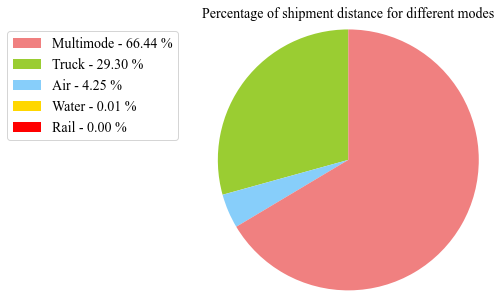

In [30]:
#pieplot for shipment distance for modes
plt.title("Percentage of shipment distance for different modes",fontsize=14)
rcParams['font.family'] = 'Times New Roman'

x = np.char.array(['Truck', 'Rail', 'Water', 'Air', 'Multimode'])
y = np.array([SD_T, SD_R, SD_W,SD_A,SD_M])
colors = ['yellowgreen','red','gold','lightskyblue','lightcoral']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
fig = plt.gcf()
fig.set_size_inches(5, 5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=14)


# Decision tree

In [2]:
Inter_w_dummy=pd.read_csv("Inter_w_dummy.csv")
X=Inter_w_dummy.iloc[:,[10,11,12,22,23,24,25,26,27,33,34]]
y=Inter_w_dummy.iloc[:,[17,18,19,20,21]]

In [3]:
X

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,NAICS(Mining),NAICS(Manufac.),NAICS(Whlsale),NAICS(Retl_trade),NAICS(Transprt_wrehous),NAICS(Informatn),Temp_contrl,Hazard
0,14,1,808,0,0,0,1,0,0,0,0
1,19,1,803,0,0,0,1,0,0,0,0
2,697,11,846,0,0,1,0,0,0,0,0
3,7,1,808,0,0,0,1,0,0,0,0
4,599,59,838,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2004645,149,33,1765,0,0,1,0,0,0,0,0
2004646,31,1,1744,0,0,0,1,0,0,0,0
2004647,106,1,801,0,1,0,0,0,0,0,0
2004648,131,1,803,0,1,0,0,0,0,0,0


In [4]:
#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_fit, X_test, y_fit, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_fit = sc.fit_transform(X_fit)
X_test = sc.transform(X_test)

In [5]:
#splitting into train and validation for parameter selection
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_fit, y_fit, test_size = 0.3, random_state = 0)

X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
Training_accuracy=[]
Validation_accuracy=[]
for depths in range(1,16,1):
    tree = DecisionTreeClassifier(max_depth=depths,criterion="entropy")
    tree.fit(X_train, y_train)
    
    #training accuracy
    y_training_pred = tree.predict(X_train)
    from sklearn.metrics import confusion_matrix, accuracy_score
    #print("Training accuracy- Interstate:",accuracy_score(y_train,y_training_pred))
    Training_accuracy.append(accuracy_score(y_train,y_training_pred))
    
    #validation accuracy
    y_validation_pred = tree.predict(X_validation)
    from sklearn.metrics import confusion_matrix, accuracy_score
    #print("Validation accuracy- Interstate:",accuracy_score(y_validation,y_validation_pred))
    Validation_accuracy.append(accuracy_score(y_validation,y_validation_pred))

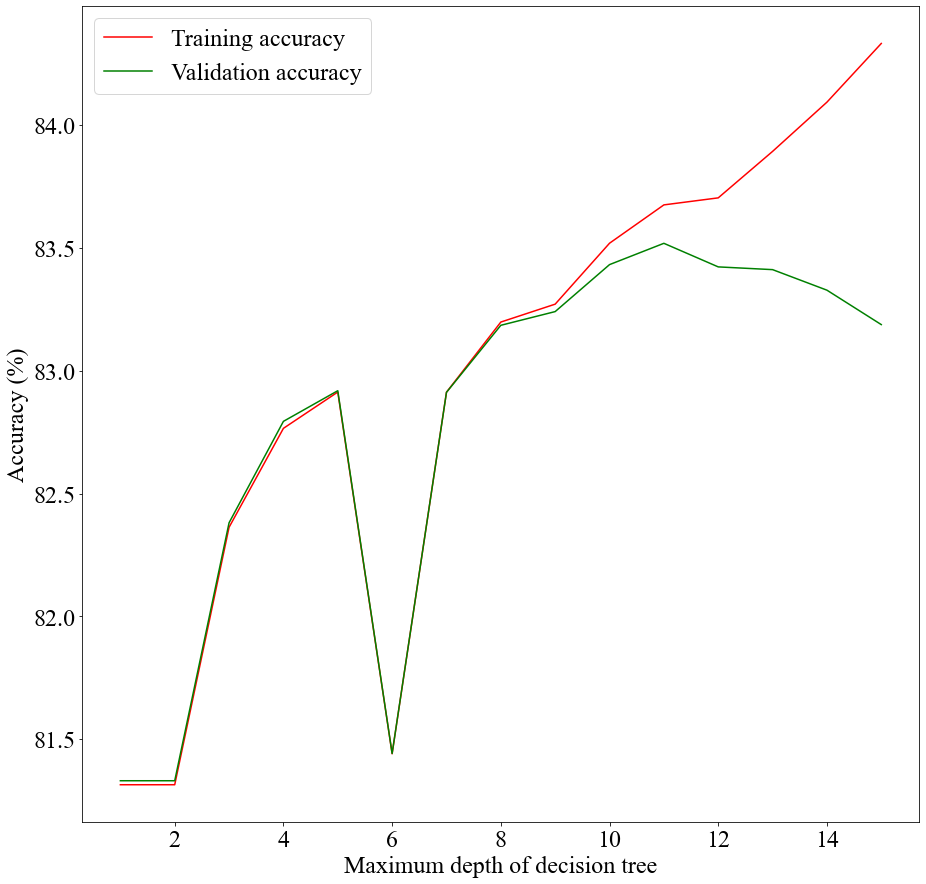

In [10]:
from matplotlib import rcParams
max_depth=range(1,16,1)
Training_accuracy2=np.array(Training_accuracy) * 100 
Validation_accuracy2=np.array(Validation_accuracy) * 100 
plt.figure(figsize=(15,15))
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 24})
TA_inter,=plt.plot(max_depth,Training_accuracy2,label="Training accuracy",color="red")
VA_inter,=plt.plot(max_depth,Validation_accuracy2,label="Validation accuracy",color="green")
plt.legend([TA_inter,VA_inter],['Training accuracy','Validation accuracy'],fontsize=24)
plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Accuracy (%)")

plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
#final modeling after paramter selection
tree = DecisionTreeClassifier(max_depth=11,criterion="entropy")
tree.fit(X_fit, y_fit)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [15]:
#fitting accuracy
y_fitting_pred=tree.predict(X_fit)
print("Fitting accuracy-interstate:",accuracy_score(y_fit,y_fitting_pred)*100)

Fitting accuracy-interstate: 83.7284741547331


In [16]:
#testing accuracy
y_test_pred=tree.predict(X_test)
print("Testing accuracy-interstate:",accuracy_score(y_test,y_test_pred)*100)

Testing accuracy-interstate: 83.61010650238197


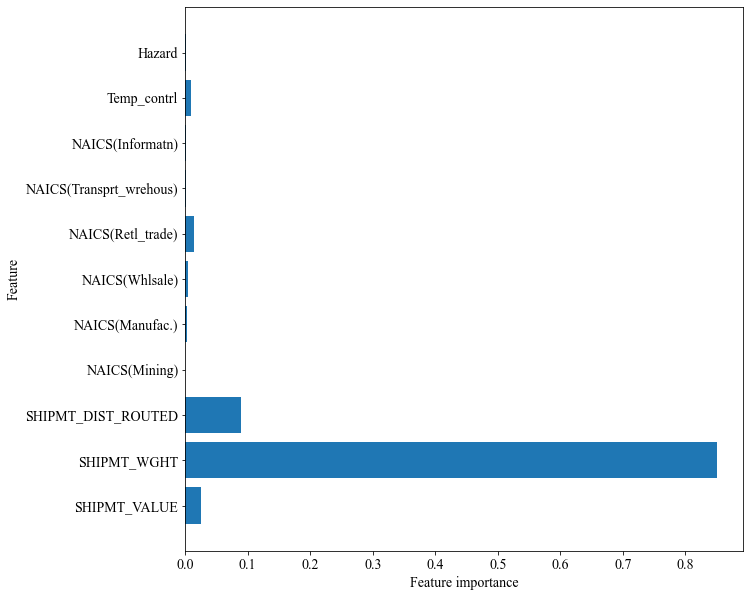

In [17]:
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_tree(model):
    n_features = len(X.columns)
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_tree(tree.fit(X_train,y_train))

# Naive Bayes

In [18]:
import pandas as  pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import confusion_matrix

In [19]:
Inter_w_dummy['MODE_NB']=Inter_w_dummy['MODE']
Inter_w_dummy['MODE_NB']=Inter_w_dummy['MODE_NB'].astype(str)
Inter_w_dummy['MODE_NB'] = Inter_w_dummy['MODE_NB'].replace(['3','4','5'],'Truck')
Inter_w_dummy['MODE_NB'] = Inter_w_dummy['MODE_NB'].replace(['6'],'Rail')
Inter_w_dummy['MODE_NB'] = Inter_w_dummy['MODE_NB'].replace(['8','9','10','101'],'Water')
Inter_w_dummy['MODE_NB'] = Inter_w_dummy['MODE_NB'].replace(['11'],'Air')
Inter_w_dummy['MODE_NB'] = Inter_w_dummy['MODE_NB'].replace(['13','14','15','16','17','18','20'],'Multimode')

X_NB=Inter_w_dummy.iloc[:,[10,11,12,22,23,24,25,26,27,33,34]]
y_NB=Inter_w_dummy.iloc[:,35]

In [20]:
X_NB

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,NAICS(Mining),NAICS(Manufac.),NAICS(Whlsale),NAICS(Retl_trade),NAICS(Transprt_wrehous),NAICS(Informatn),Temp_contrl,Hazard
0,14,1,808,0,0,0,1,0,0,0,0
1,19,1,803,0,0,0,1,0,0,0,0
2,697,11,846,0,0,1,0,0,0,0,0
3,7,1,808,0,0,0,1,0,0,0,0
4,599,59,838,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2004645,149,33,1765,0,0,1,0,0,0,0,0
2004646,31,1,1744,0,0,0,1,0,0,0,0
2004647,106,1,801,0,1,0,0,0,0,0,0
2004648,131,1,803,0,1,0,0,0,0,0,0


In [21]:
#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_fit, X_test, y_fit, y_test = train_test_split(X_NB, y_NB, test_size = 0.3, random_state = 0)

In [45]:
#splitting into train and validation for parameter selection
# from sklearn.model_selection import train_test_split
# X_train, X_validation, y_train, y_validation = train_test_split(X_fit, y_fit, test_size = 0.3, random_state = 0)
# X_train = sc.fit_transform(X_train)
# X_validation = sc.transform(X_validation)

In [22]:
#fit the model
nb = MultinomialNB()
nb.fit(X_fit, y_fit)

MultinomialNB()

In [23]:
#fitting accuracy
y_fitting_pred = nb.predict(X_fit)
#y_training_pred=(y_training_pred>.5)
from sklearn.metrics import confusion_matrix, accuracy_score
print("Fitting accuracy- Interstate:",accuracy_score(y_fit,y_fitting_pred))

Fitting accuracy- Interstate: 0.5728210482057787


In [24]:
#testing accuracy
y_test_pred = nb.predict(X_test)
#y_test_pred=(y_validation_pred>.5)
from sklearn.metrics import confusion_matrix, accuracy_score
print("Testing accuracy- Interstate:",accuracy_score(y_test,y_test_pred))

Testing accuracy- Interstate: 0.5739139833221094


In [25]:
print(confusion_matrix(y_test,y_test_pred))

[[  4159   9802    152   2147    930]
 [ 51509 254570    777  20498  29456]
 [     0      0      3      4      1]
 [ 18732  39871  45653  86400  36709]
 [     0      1      3      1     17]]


In [26]:
# permutation feature importance with knn for classification
from sklearn.inspection import permutation_importance
# perform permutation importance
results_nb = permutation_importance(nb, X_fit, y_fit, scoring='accuracy')
# get importance
importance_nb = results_nb.importances_mean
# summarize feature importance
for i,v in enumerate(importance_nb):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.15946
Feature: 1, Score: 0.19653
Feature: 2, Score: 0.03901
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00028
Feature: 5, Score: 0.00005
Feature: 6, Score: 0.00005
Feature: 7, Score: 0.00008
Feature: 8, Score: -0.00001
Feature: 9, Score: 0.00011
Feature: 10, Score: -0.00001


(-1.0, 11.0)

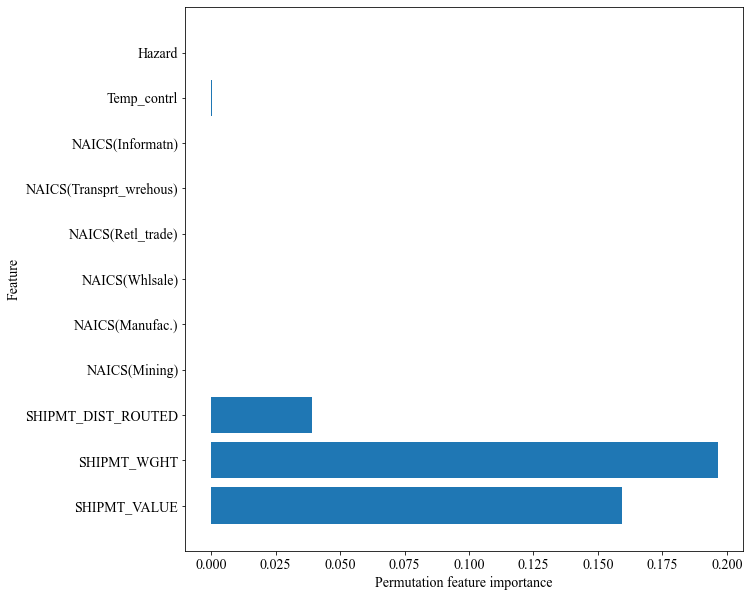

In [27]:
fig,ax=plt.subplots(figsize=(10,10))

n_features = len(X.columns)
plt.barh(range(n_features), importance_nb, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Permutation feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# KNN

In [22]:
Inter_w_dummy=pd.read_csv("Inter_w_dummy.csv")
Inter_w_dummy['MODE_KNN']=Inter_w_dummy['MODE']
Inter_w_dummy['MODE_KNN']=Inter_w_dummy['MODE_KNN'].astype(str)
Inter_w_dummy['MODE_KNN'] = Inter_w_dummy['MODE_KNN'].replace(['3','4','5'],'Truck')
Inter_w_dummy['MODE_KNN'] = Inter_w_dummy['MODE_KNN'].replace(['6'],'Rail')
Inter_w_dummy['MODE_KNN'] = Inter_w_dummy['MODE_KNN'].replace(['8','9','10','101'],'Water')
Inter_w_dummy['MODE_KNN'] = Inter_w_dummy['MODE_KNN'].replace(['11'],'Air')
Inter_w_dummy['MODE_KNN'] = Inter_w_dummy['MODE_KNN'].replace(['13','14','15','16','17','18','20'],'Multimode')

In [23]:
X_KNN=Inter_w_dummy.iloc[:,[10,11,12,22,23,24,25,26,27,33,34]]
y_KNN=Inter_w_dummy.iloc[:,35]

In [24]:
X_KNN

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,NAICS(Mining),NAICS(Manufac.),NAICS(Whlsale),NAICS(Retl_trade),NAICS(Transprt_wrehous),NAICS(Informatn),Temp_contrl,Hazard
0,14,1,808,0,0,0,1,0,0,0,0
1,19,1,803,0,0,0,1,0,0,0,0
2,697,11,846,0,0,1,0,0,0,0,0
3,7,1,808,0,0,0,1,0,0,0,0
4,599,59,838,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2004645,149,33,1765,0,0,1,0,0,0,0,0
2004646,31,1,1744,0,0,0,1,0,0,0,0
2004647,106,1,801,0,1,0,0,0,0,0,0
2004648,131,1,803,0,1,0,0,0,0,0,0


In [25]:
#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_fit, X_test, y_fit, y_test = train_test_split(X_KNN, y_KNN, test_size = 0.95, random_state = 0)

In [26]:
X_test

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,NAICS(Mining),NAICS(Manufac.),NAICS(Whlsale),NAICS(Retl_trade),NAICS(Transprt_wrehous),NAICS(Informatn),Temp_contrl,Hazard
902145,33,8,181,0,0,1,0,0,0,1,0
582919,3697,1152,520,0,0,1,0,0,0,0,0
1492092,409,120,426,0,1,0,0,0,0,0,0
1099192,416,17,721,0,1,0,0,0,0,0,0
23455,8537,22,1665,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1985632,26,1,420,0,0,1,0,0,0,0,0
793404,26,1,60,0,0,1,0,0,0,0,0
1457309,224,3,480,0,1,0,0,0,0,0,0
270105,6940,35,1499,0,1,0,0,0,0,0,0


In [27]:
X_fit

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,NAICS(Mining),NAICS(Manufac.),NAICS(Whlsale),NAICS(Retl_trade),NAICS(Transprt_wrehous),NAICS(Informatn),Temp_contrl,Hazard
179222,385,3,2389,0,1,0,0,0,0,0,0
1383116,280,3,2112,0,1,0,0,0,0,0,0
1847070,126,8,448,0,0,1,0,0,0,0,0
1473355,989,534,258,0,0,1,0,0,0,0,0
695411,171,19,376,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
152315,104,10,281,0,0,0,0,1,0,0,0
963395,122,3,901,0,0,1,0,0,0,0,0
117952,10348,160,504,0,1,0,0,0,0,0,0
1484405,798,1,512,0,0,1,0,0,0,0,0


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_fit = sc.fit_transform(X_fit)
X_test = sc.transform(X_test)

In [29]:
#splitting into train and validation for parameter selection
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_fit, y_fit, test_size = 0.95, random_state = 0)

X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

In [30]:
X_train.shape


(5011, 11)

In [31]:
X_validation.shape

(95221, 11)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy_knn = []
validation_accuracy_knn = []

In [33]:
k = range(3, 25,2)

for ks in k:
    clf = KNeighborsClassifier(n_neighbors=ks)#neighbors_settings)
    print("neighbors: ",ks)
    clf.fit(X_train, y_train)
    training_accuracy_knn.append(clf.score(X_train, y_train))
    validation_accuracy_knn.append(clf.score(X_validation, y_validation))

neighbors:  3
neighbors:  5
neighbors:  7
neighbors:  9
neighbors:  11
neighbors:  13
neighbors:  15
neighbors:  17
neighbors:  19
neighbors:  21
neighbors:  23


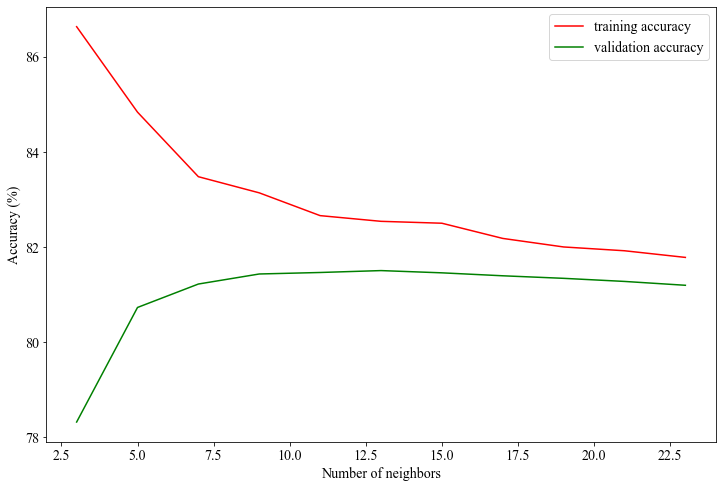

In [38]:
# print(neighbors_settings, " finished")
from matplotlib import rcParams
plt.figure(figsize=(12,8))
k = range(3, 25,2)
Training_accuracy2=np.multiply(np.array(training_accuracy_knn),100)
Validation_accuracy2=np.multiply(np.array(validation_accuracy_knn),100) 
plt.plot(k, Training_accuracy2, label="training accuracy",color="red")
plt.plot(k, Validation_accuracy2, label="validation accuracy",color="green")
plt.ylabel("Accuracy (%)")
plt.xlabel("Number of neighbors")
plt.legend()
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

In [44]:
# finally build the model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_fit, y_fit)

KNeighborsClassifier(n_neighbors=13)

In [42]:
#from sklearn.metrics import confusion_matrix, accuracy_score
# y_fit_predicted=clf.predict(X_fit)
print("Fitting accuracy-KNN: ",(clf.score(X_fit, y_fit))*100)
#print("Testing accuracy-KNN: ",(accuracy_score(X_test, clf.predict(X_test)))*100)

Fitting accuracy-KNN:  84.3971984994812


In [ ]:
#DON"T RUN it will take indefinite time, only run with supercomputer :(
#print("Testing accuracy-KNN: ",(clf.score(X_test, y_test))*100)

In [51]:
#instead run this with small data
print("Testing accuracy-KNN: ",(clf.score(X_test[0:5000], y_test[0:5000])*100))

Testing accuracy-KNN:  83.17999999999999


In [54]:
X_fit.head(100)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [55]:
# permutation feature importance with knn for classification
from sklearn.inspection import permutation_importance
# perform permutation importance
results_knn = permutation_importance(clf, X_fit[0:5000], y_fit[0:5000], scoring='accuracy')
# get importance
importance_knn = results_knn.importances_mean
# summarize feature importance
for i,v in enumerate(importance_knn):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01764
Feature: 1, Score: 0.27440
Feature: 2, Score: 0.03892
Feature: 3, Score: 0.00004
Feature: 4, Score: 0.00960
Feature: 5, Score: 0.01448
Feature: 6, Score: 0.00692
Feature: 7, Score: 0.00204
Feature: 8, Score: 0.00156
Feature: 9, Score: 0.00312
Feature: 10, Score: 0.00384


(-1.0, 11.0)

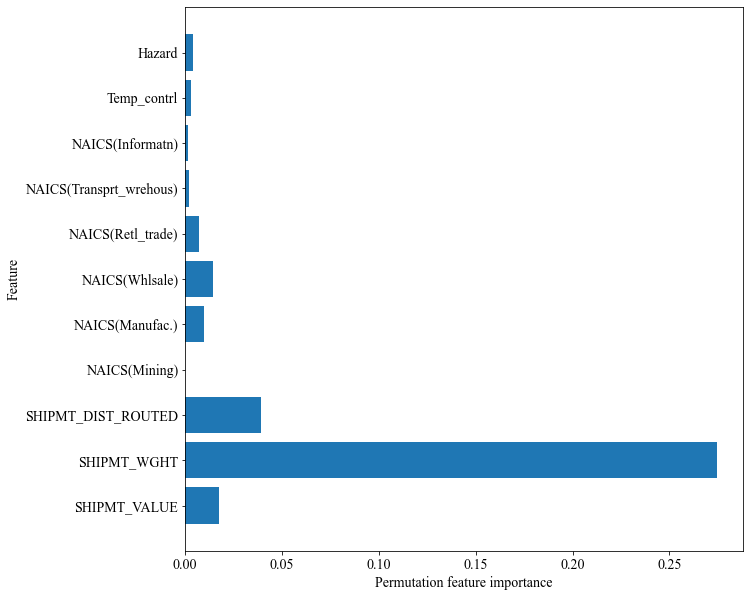

In [60]:
# plot feature importance
fig,ax=plt.subplots(figsize=(10,10))

n_features = len(X_KNN.columns)
plt.barh(range(n_features), importance_knn, align='center')
plt.yticks(np.arange(n_features), X_KNN.columns)
plt.xlabel("Permutation feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Bagging

In [3]:
import pandas as  pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
Inter_w_dummy=pd.read_csv("Inter_w_dummy.csv")
Inter_w_dummy['MODE_b']=Inter_w_dummy['MODE']
Inter_w_dummy['MODE_b']=Inter_w_dummy['MODE_b'].astype(str)
Inter_w_dummy['MODE_b'] = Inter_w_dummy['MODE_b'].replace(['3','4','5'],'Truck')
Inter_w_dummy['MODE_b'] = Inter_w_dummy['MODE_b'].replace(['6'],'Rail')
Inter_w_dummy['MODE_b'] = Inter_w_dummy['MODE_b'].replace(['8','9','10','101'],'Water')
Inter_w_dummy['MODE_b'] = Inter_w_dummy['MODE_b'].replace(['11'],'Air')
Inter_w_dummy['MODE_b'] = Inter_w_dummy['MODE_b'].replace(['13','14','15','16','17','18','20'],'Multimode')

In [5]:
X_b=Inter_w_dummy.iloc[:,[10,11,12,22,23,24,25,26,27,33,34]]
y_b=Inter_w_dummy.iloc[:,35]

In [6]:
#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_fit, X_test, y_fit, y_test = train_test_split(X_b, y_b, test_size = 0.3, random_state = 0)

In [7]:
#splitting into train and validation for parameter selection
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_fit, y_fit, test_size = 0.3, random_state = 0)

In [16]:
from sklearn.ensemble import BaggingClassifier
from numpy import arange
from time import process_time 
estimators_list=[]
accuracy_validation_bag=[]
accuracy_training_bag=[]
for estimator in range(10,95,10):
        estimators_list.append(estimator)
        t1_start = process_time()
        print("number of estimator: ",estimator)
        bag=BaggingClassifier(n_estimators=estimator,max_samples=70)
        bag.fit(X_train,y_train)
        y_train_predicted=bag.predict(X_train)
        y_validation_predicted=bag.predict(X_validation)
        accuracy_train=accuracy_score(y_train,y_train_predicted)
        accuracy_training_bag.append(accuracy_train*100)
        print("Accuracy training: ",accuracy_train)
        
        accuracy_val=accuracy_score(y_validation,y_validation_predicted)
        accuracy_validation_bag.append(accuracy_val*100)
        print("Accuracy validation: ",accuracy_val)

        t1_stop = process_time() 
        print("Elapsed time:", (t1_stop-t1_start))


number of estimator:  10
Accuracy training:  0.8199766257617497
Accuracy validation:  0.820398739123515
Elapsed time: 5.765625
number of estimator:  20
Accuracy training:  0.8279723255534583
Accuracy validation:  0.8287721181917302
Elapsed time: 8.984375
number of estimator:  30
Accuracy training:  0.8251808551143363
Accuracy validation:  0.8260332512227508
Elapsed time: 12.28125
number of estimator:  40
Accuracy training:  0.8307576877421666
Accuracy validation:  0.831712896429021
Elapsed time: 15.5
number of estimator:  50
Accuracy training:  0.8294596845292269
Accuracy validation:  0.8304515448587453
Elapsed time: 18.890625
number of estimator:  60
Accuracy training:  0.8297376099230565
Accuracy validation:  0.8306297018601967
Elapsed time: 23.015625
number of estimator:  70
Accuracy training:  0.8281861143179425
Accuracy validation:  0.8287721181917302
Elapsed time: 27.453125
number of estimator:  80
Accuracy training:  0.8295329835341929
Accuracy validation:  0.8299503298279953
El

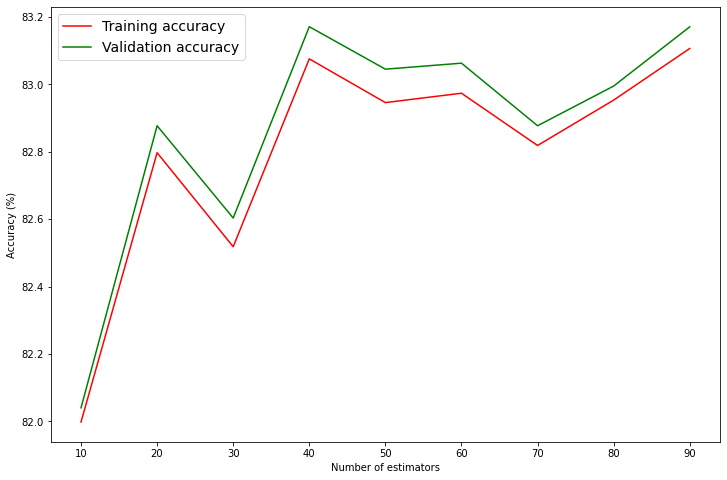

In [18]:
from matplotlib import rcParams
max_depth=range(10,95,10)
Training_accuracy_bag=np.array(accuracy_training_bag) 
Validation_accuracy_bag=np.array(accuracy_validation_bag) 
plt.figure(figsize=(12,8))
TA_inter_bag,=plt.plot(max_depth,Training_accuracy_bag,label="Training accuracy",color="red")
VA_inter_bag,=plt.plot(max_depth,Validation_accuracy_bag,label="Validation accuracy",color="green")
plt.legend([TA_inter_bag,VA_inter_bag],['Training accuracy','Validation accuracy'],fontsize=14)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy (%)")
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

In [50]:
from sklearn.ensemble import BaggingClassifier

In [20]:
#fit the model
bag=BaggingClassifier(n_estimators=90,max_samples=70)
bag.fit(X_fit,y_fit)
y_fit_predicted=bag.predict(X_fit)
y_test_predicted=bag.predict(X_test)
print("Fitting accuracy-Bag: ",(accuracy_score(y_fit, y_fit_predicted))*100)
print("Testing accuracy-Bag: ",(accuracy_score(y_test, y_test_predicted))*100)

Fitting accuracy-Bag:  83.12637403750566
Testing accuracy-Bag:  83.19739937977536


In [28]:
X_b

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_ROUTED,NAICS(Mining),NAICS(Manufac.),NAICS(Whlsale),NAICS(Retl_trade),NAICS(Transprt_wrehous),NAICS(Informatn),NAICS(Pro_sci_tech_servc),first3months,Hazard
0,14,1,808,0,0,0,1,0,0,0,0,0
1,19,1,803,0,0,0,1,0,0,0,0,0
2,697,11,846,0,0,1,0,0,0,0,1,0
3,7,1,808,0,0,0,1,0,0,0,0,0
4,599,59,838,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2004645,149,33,1765,0,0,1,0,0,0,0,0,0
2004646,31,1,1744,0,0,0,1,0,0,0,0,0
2004647,106,1,801,0,1,0,0,0,0,0,0,0
2004648,131,1,803,0,1,0,0,0,0,0,0,0


(-1.0, 11.0)

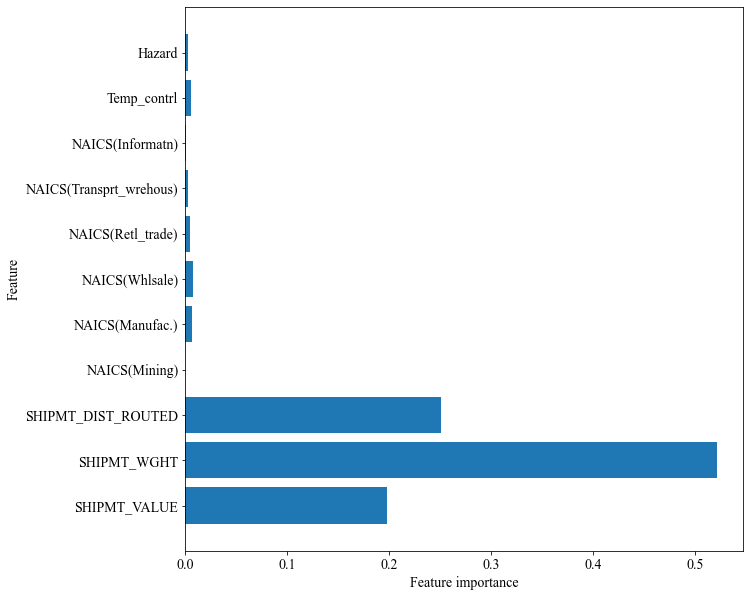

In [56]:
fig,ax=plt.subplots(figsize=(10,10))

n_features = len(X_b.columns)
plt.barh(range(n_features), feature_importances, align='center')
plt.yticks(np.arange(n_features), X_b.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

In [35]:
range(len(X_b.columns))

range(0, 12)

In [53]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bag.estimators_
], axis=0)

In [54]:
feature_importances

array([1.97541988e-01, 5.20900978e-01, 2.50568091e-01, 1.32002408e-04,
       6.24517927e-03, 7.72686211e-03, 4.21941453e-03, 3.04690633e-03,
       1.06016608e-03, 5.35018576e-03, 3.20822654e-03])

# RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from numpy import arange

In [19]:
estimators_list=[]
accuracy_validation_rf=[]
accuracy_training_rf=[]
from time import process_time 
for estimator in range(10,113,10):
        t1_start = process_time()
        estimators_list.append(estimator)
        print("number of estimator: ",estimator)
        rf=RandomForestClassifier(n_estimators=estimator)
        rf.fit(X_train,y_train)
        y_train_predicted=rf.predict(X_train)
        y_validation_predicted=rf.predict(X_validation)
        t1_stop = process_time() 
        print("Elapsed time:", (t1_stop-t1_start))
        accuracy_train=accuracy_score(y_train,y_train_predicted)
        accuracy_training_rf.append(accuracy_train*100)
        accuracy_val=accuracy_score(y_validation,y_validation_predicted)
        accuracy_validation_rf.append(accuracy_val*100)

number of estimator:  10
Elapsed time: 38.875
number of estimator:  20
Elapsed time: 75.96875
number of estimator:  30
Elapsed time: 108.390625
number of estimator:  40
Elapsed time: 146.53125
number of estimator:  50
Elapsed time: 181.375
number of estimator:  60
Elapsed time: 223.78125
number of estimator:  70
Elapsed time: 262.203125
number of estimator:  80
Elapsed time: 296.46875
number of estimator:  90
Elapsed time: 335.265625
number of estimator:  100
Elapsed time: 375.4375
number of estimator:  110
Elapsed time: 416.984375


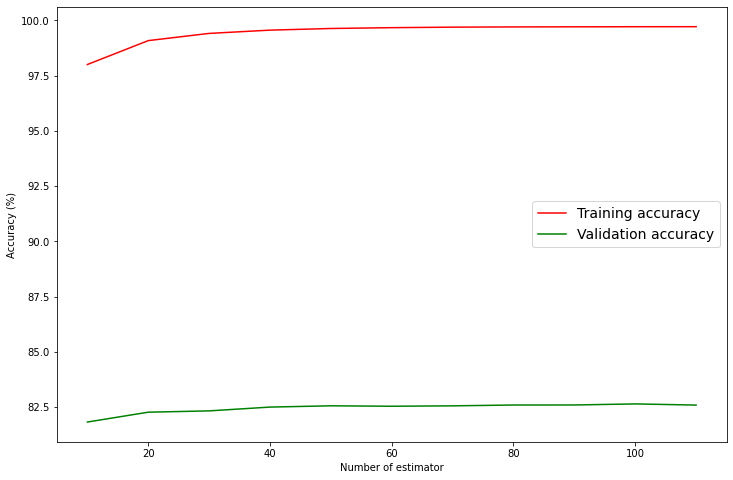

In [20]:
from matplotlib import rcParams
max_depth=range(10,113,10)
Training_accuracy_rf=np.array(accuracy_training_rf)  
Validation_accuracy_rf=np.array(accuracy_validation_rf) 
plt.figure(figsize=(12,8))
TA_inter_rf,=plt.plot(max_depth,Training_accuracy_rf,label="Training accuracy",color="red")
VA_inter_rf,=plt.plot(max_depth,Validation_accuracy_rf,label="Validation accuracy",color="green")
plt.legend([TA_inter_rf,VA_inter_rf],['Training accuracy','Validation accuracy'],fontsize=14)
plt.xlabel("Number of estimator")
plt.ylabel("Accuracy (%)")
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

In [11]:
accuracy_validation


[81.76052373407573,
 82.22634490720395,
 82.39785071393449,
 82.47148894120106,
 82.47790259325332,
 82.47267665454407,
 82.48906709867761,
 82.56816880732202,
 82.57482000204287,
 82.61520225570519,
 82.58598450746716]

In [12]:
accuracy_training

[98.01247711951198,
 99.07694155829613,
 99.41605126043747,
 99.56753587070055,
 99.64154750488152,
 99.6759573155461,
 99.69692897530027,
 99.70894186778081,
 99.71382846811187,
 99.71739161418661,
 99.71952950183146]

In [13]:
rf=RandomForestClassifier(n_estimators=80)
rf.fit(X_train,y_train)
y_fit_predicted=rf.predict(X_fit)
y_test_predicted=rf.predict(X_test)

In [14]:
accuracy_fit_rf=accuracy_score(y_fit,y_fit_predicted)
print("accuracy_fit_rf: ",accuracy_fit_rf*100)

accuracy_test_rf=accuracy_score(y_test,y_test_predicted)
print("accuracy_test_rf: ",accuracy_test_rf*100)

accuracy_fit_rf:  94.56698889367934
accuracy_test_rf:  82.55173388538314


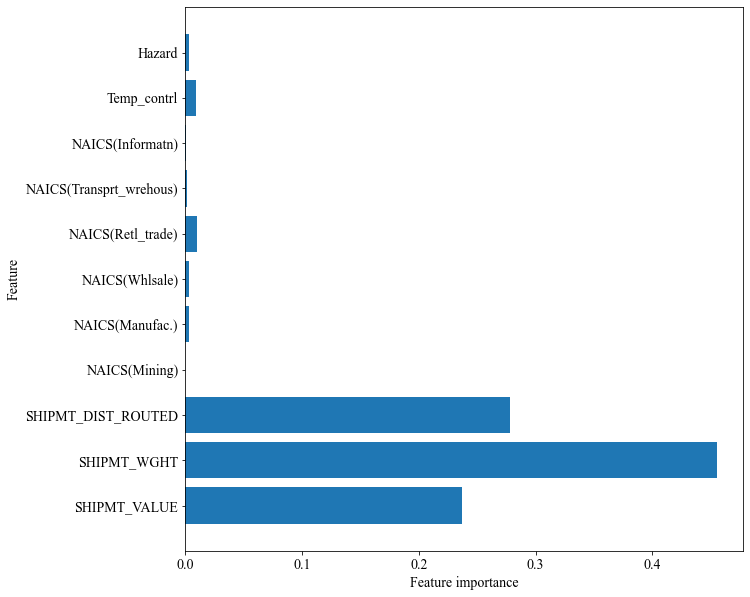

In [16]:
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_rf(model):
    n_features = len(X_b.columns)
    plt.barh(range(n_features), rf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_b.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_rf(rf.fit(X_train,y_train))

# Boosting

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from numpy import arange
estimators_list=[]
accuracy_validation=[]
accuracy_training=[]
for estimator in range(10,101,10):
        t1_start = process_time()
        estimators_list.append(estimator)
        print("number of estimator: ",estimator)
        boost=AdaBoostClassifier(n_estimators=estimator)
        boost.fit(X_train,y_train)
        y_train_predicted=boost.predict(X_train)
        y_validation_predicted=boost.predict(X_validation)
        t1_stop = process_time() 
        print("Elapsed time:", (t1_stop-t1_start))
        accuracy_train=accuracy_score(y_train,y_train_predicted)
        accuracy_training.append(accuracy_train*100)
        accuracy_val=accuracy_score(y_validation,y_validation_predicted)
        accuracy_validation.append(accuracy_val*100)

number of estimator:  10
Elapsed time: 24.546875
number of estimator:  20
Elapsed time: 52.21875
number of estimator:  30
Elapsed time: 74.03125
number of estimator:  40
Elapsed time: 103.578125
number of estimator:  50
Elapsed time: 122.609375
number of estimator:  60
Elapsed time: 145.390625
number of estimator:  70
Elapsed time: 171.65625
number of estimator:  80
Elapsed time: 195.40625
number of estimator:  90
Elapsed time: 218.578125
number of estimator:  100
Elapsed time: 241.5625


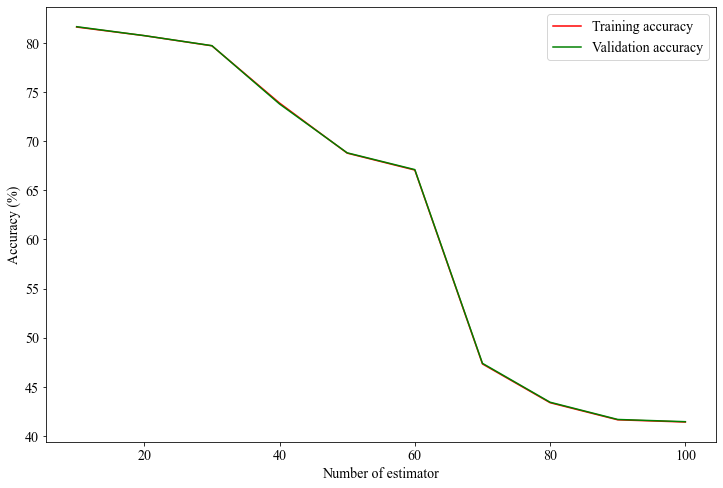

In [18]:
from matplotlib import rcParams
estimators=range(10,101,10)
Training_accuracy4=np.array(accuracy_training)
Validation_accuracy4=np.array(accuracy_validation)
plt.figure(figsize=(12,8))
TA_inter,=plt.plot(estimators,Training_accuracy4,label="Training accuracy",color="red")
VA_inter,=plt.plot(estimators,Validation_accuracy4,label="Validation accuracy",color="green")
plt.legend([TA_inter,VA_inter],['Training accuracy','Validation accuracy'],fontsize=14)
plt.xlabel("Number of estimator")
plt.ylabel("Accuracy (%)")
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

In [19]:
Training_accuracy4

array([81.6029678 , 80.72714649, 79.69464856, 73.87277329, 68.77472569,
       67.05515139, 47.32672421, 43.38354315, 41.64228457, 41.41790817])

In [20]:
boost=AdaBoostClassifier(n_estimators=10)
boost.fit(X_train,y_train)
y_fit_predicted=boost.predict(X_fit)
y_test_predicted=boost.predict(X_test)

accuracy_fit=(accuracy_score(y_fit,y_fit_predicted))*100
print("Fitting accuracy: ",accuracy_fit)

accuracy_test=(accuracy_score(y_test,y_test_predicted))*100
print("Testing accuracy: ",accuracy_test)


Fitting accuracy:  81.61424687601327
Testing accuracy:  81.64268076721622


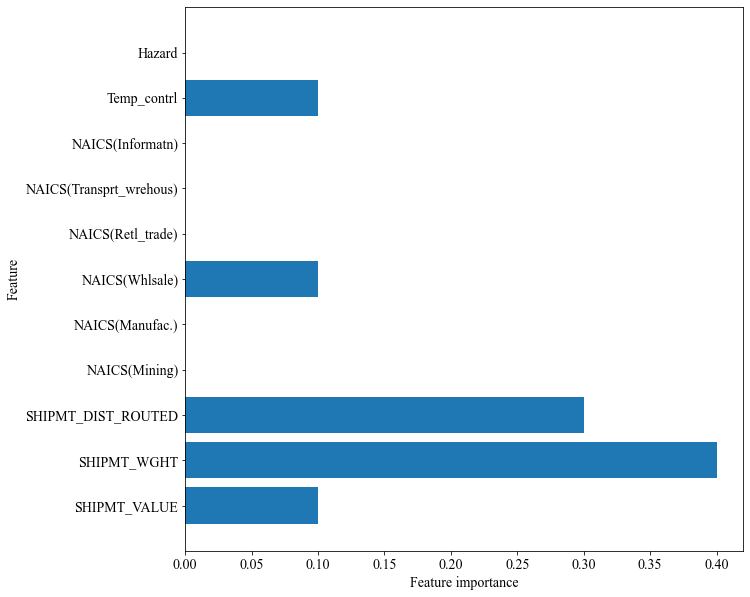

In [21]:
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_boost(model):
    n_features = len(X_b.columns)
    plt.barh(range(n_features), boost.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_b.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_boost(boost.fit(X_train,y_train))

# SVM

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Inter_w_dummy=pd.read_csv("Inter_w_dummy.csv")
Inter_w_dummy['MODE_SVM']=Inter_w_dummy['MODE']
Inter_w_dummy['MODE_SVM']=Inter_w_dummy['MODE_SVM'].astype(str)
Inter_w_dummy['MODE_SVM'] = Inter_w_dummy['MODE_SVM'].replace(['3','4','5'],'Truck')
Inter_w_dummy['MODE_SVM'] = Inter_w_dummy['MODE_SVM'].replace(['6'],'Rail')
Inter_w_dummy['MODE_SVM'] = Inter_w_dummy['MODE_SVM'].replace(['8','9','10','101'],'Water')
Inter_w_dummy['MODE_SVM'] = Inter_w_dummy['MODE_SVM'].replace(['11'],'Air')
Inter_w_dummy['MODE_SVM'] = Inter_w_dummy['MODE_SVM'].replace(['13','14','15','16','17','18','20'],'Multimode')

X_SVM=Inter_w_dummy.iloc[:,[10,11,12,22,23,24,25,26,27,33,34]]
y_SVM=Inter_w_dummy.iloc[:,35]

In [3]:
#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_fit_inter_SVM, X_test_inter_SVM, y_fit_inter_SVM, y_test_inter_SVM = train_test_split(X_SVM, y_SVM, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_fit_inter_SVM = sc.fit_transform(X_fit_inter_SVM)
X_test_inter_SVM = sc.transform(X_test_inter_SVM)

In [4]:
#splitting into train and validation for parameter selection
from sklearn.model_selection import train_test_split
X_train_inter_SVM, X_validation_inter_SVM, y_train_inter_SVM, y_validation_inter_SVM = train_test_split(X_fit_inter_SVM,
                                                                                                        y_fit_inter_SVM,
                                                                                                        test_size = 0.3,
                                                                                                        random_state = 0)

X_train_inter_SVM = sc.fit_transform(X_train_inter_SVM)
X_train_inter_SVM = sc.transform(X_train_inter_SVM)

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [16]:
from time import process_time
from numpy import arange
C_param=[]
gamma_param=[]
accuracy_validation=[]
accuracy_training=[]
for c in arange(10,100,20):
    for gama in arange (0.001,0.05,.005):
        t1_start = process_time()
        
        model=SVC(kernel="rbf",max_iter=200,C=c,gamma=gama)
        model.fit(X_train_inter_SVM,y_train_inter_SVM)
        predicted=model.predict(X_validation_inter_SVM)
        
        t1_stop = process_time() 
        print("Elapsed time:", (t1_stop-t1_start))
        
        #accuracy_train=accuracy_score(np.array(y_train_intra_SVC),predicted)
        accuracy_val=accuracy_score(y_validation_inter_SVM,predicted)
        C_param.append(c)
        gamma_param.append(gama)
        #accuracy_training.append(accuracy_train)
        accuracy_validation.append(accuracy_val)
    

C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 62.171875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 62.671875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 63.953125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 62.421875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 63.03125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 63.015625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 63.328125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.046875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.21875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 62.59375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.796875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.140625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.703125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 66.125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 63.546875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 65.046875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 63.875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 63.71875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.4375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.234375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.453125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 65.546875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 65.046875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 66.90625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 66.625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 65.4375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 63.734375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 65.28125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 62.671875


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 63.484375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.203125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 66.65625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.984375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.4375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 65.890625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.265625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 65.984375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.140625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 66.03125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.65625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.515625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 65.65625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 64.65625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 66.140625


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 65.734375


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 62.078125


C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Elapsed time: 61.640625


In [17]:
val_accu_inter_SVM=pd.DataFrame(list(zip(C_param, gamma_param,accuracy_validation)), 
               columns =['C', 'gamma','validation accuracy (Interstate) (SVM)'])

In [18]:
val_accu_inter_SVM

,C,gamma,validation accuracy (Interstate) (SVM)
0,10,0.001,0.377443
1,10,0.006,0.372852
2,10,0.011,0.365927
3,10,0.016,0.396779
4,10,0.021,0.469878
5,10,0.026,0.439214
6,10,0.031,0.326360
7,10,0.036,0.139504
8,10,0.041,0.162227
9,10,0.046,0.324756


In [19]:
pivot_inter_SVM=pd.pivot_table(val_accu_inter_SVM, 
               index=['C'],columns=['gamma'],
                      values=['validation accuracy (Interstate) (SVM)'])

In [20]:
pivot_inter_SVM

validation accuracy (Interstate) (SVM)                                \
gamma                                  0.001     0.006     0.011     0.016   
C                                                                            
10                                  0.377443  0.372852  0.365927  0.396779   
30                                  0.377443  0.373963  0.365797  0.421246   
50                                  0.377443  0.373963  0.365797  0.417852   
70                                  0.377443  0.373963  0.365794  0.437185   
90                                  0.377443  0.370405  0.365146  0.062652   

                                                                   
gamma     0.021     0.026     0.031     0.036     0.041     0.046  
C                                                                  
10     0.469878  0.439214  0.326360  0.139504  0.162227  0.324756  
30     0.418365  0.297612  0.327683  0.247401  0.317877  0.366431  
50     0.453098  0.093939  0.316305  0.243728  0.360307  0.397257  
70     0.480283  0.370802  0.405466  0.365493  0.340463  0.218295  
90     0.473876  0.370859  0.389824  0.523877  0.340465  0.362554

In [22]:
pivot_inter_SVM.to_csv("param_sel_SVM_inter.csv")

In [6]:
model=SVC(kernel="rbf",max_iter=200,C=90,gamma=.036)
model.fit(X_train_inter_SVM,y_train_inter_SVM)

C:\Users\Moon\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=90, gamma=0.036, max_iter=200)

In [7]:
#fitting accuracy
y_fitting_pred_SVM_inter=model.predict(X_fit_inter_SVM)
print("Fitting accuracy-interstate:",accuracy_score(y_fit_inter_SVM,y_fitting_pred_SVM_inter)*100)

#testing accuracy
y_test_pred_SVM_inter=model.predict(X_test_inter_SVM)
print("Testing accuracy-interstate:",accuracy_score(y_test_inter_SVM,y_test_pred_SVM_inter)*100)
 

Fitting accuracy-interstate: 52.261492031027856
Testing accuracy-interstate: 52.29059104249287


In [8]:
# permutation feature importance with knn for classification
from sklearn.inspection import permutation_importance
# perform permutation importance
results_SVM = permutation_importance(model, X_fit_inter_SVM, y_fit_inter_SVM, scoring='accuracy')
# get importance
importance_SVM = results_SVM.importances_mean
# summarize feature importance
for i,v in enumerate(importance_SVM):
    print('Feature: %0d, Score: %.5f' % (i,v))



Feature: 0, Score: -0.00469
Feature: 1, Score: 0.01093
Feature: 2, Score: 0.02968
Feature: 3, Score: 0.00001
Feature: 4, Score: 0.01346
Feature: 5, Score: 0.00331
Feature: 6, Score: 0.02102
Feature: 7, Score: 0.00634
Feature: 8, Score: 0.00019
Feature: 9, Score: -0.01510
Feature: 10, Score: 0.00096


(-1.0, 11.0)

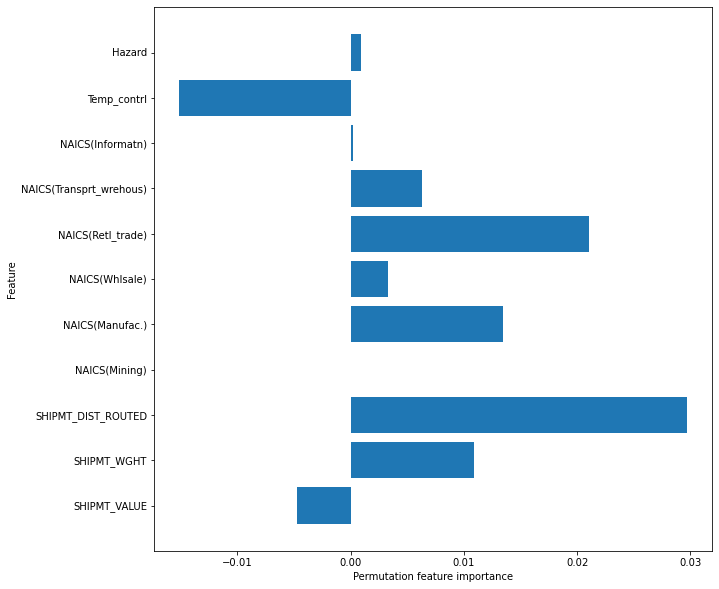

In [11]:
# plot feature importance
fig,ax=plt.subplots(figsize=(10,10))

n_features = len(X_SVM.columns)
plt.barh(range(n_features), importance_SVM, align='center')
plt.yticks(np.arange(n_features), X_SVM.columns)
plt.xlabel("Permutation feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# ANN

In [31]:
Inter_w_dummy=pd.read_csv("Inter_w_dummy.csv")
X=Inter_w_dummy.iloc[:,[10,11,12,22,23,24,25,26,27,28,29,34]]
y=Inter_w_dummy.iloc[:,[17,18,19,20,21]]

In [38]:
#splitting into fit and test data
from sklearn.model_selection import train_test_split
X_fit, X_test, y_fit, y_test = train_test_split(X_ANN, y_ANN, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_fit = sc.fit_transform(X_fit)
X_test = sc.transform(X_test)


In [39]:
#splitting into train and validation for parameter selection
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_fit, y_fit, test_size = 0.3, random_state = 0)

X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

In [26]:
pip install tensorflow

  Using cached tensorflow-2.3.1-cp38-cp38-win_amd64.whl (342.5 MB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
Processing c:\users\moon\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)
  Using cached pyasn1-0.4.8-py2.py3-none

In [40]:
import tensorflow as tf
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [43]:
Training_accuracy=[]
Validation_accuracy=[]
for i in range(1,31,2):
    ann = tf.keras.models.Sequential()
    t1_start = process_time()
    ann.add(tf.keras.layers.Dense(units=i, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    ann.fit(X_train, y_train, batch_size = 10000, epochs = 20)
    #training accuracy
    y_training_pred = ann.predict(X_train)
    y_training_pred=(y_training_pred>.5)
    from sklearn.metrics import confusion_matrix, accuracy_score
    print("HIdden unit: ",i)
    print("Training accuracy- Interstate:",accuracy_score(y_train,y_training_pred))
    Training_accuracy.append(accuracy_score(y_train,y_training_pred))
    #validation accuracy
    y_validation_pred = ann.predict(X_validation)
    y_validation_pred=(y_validation_pred>.5)
    from sklearn.metrics import confusion_matrix, accuracy_score
    print("Validation accuracy- Interstate:",accuracy_score(y_validation,y_validation_pred))
    Validation_accuracy.append(accuracy_score(y_validation,y_validation_pred))
    t1_stop = process_time() 
    print("Elapsed time:", (t1_stop-t1_start))


Epoch 1/20


UnimplementedError:  Cast string to float is not supported
	 [[node binary_crossentropy/Cast (defined at <ipython-input-43-2ef0b5e2441e>:9) ]] [Op:__inference_train_function_1141959]

Function call stack:
train_function


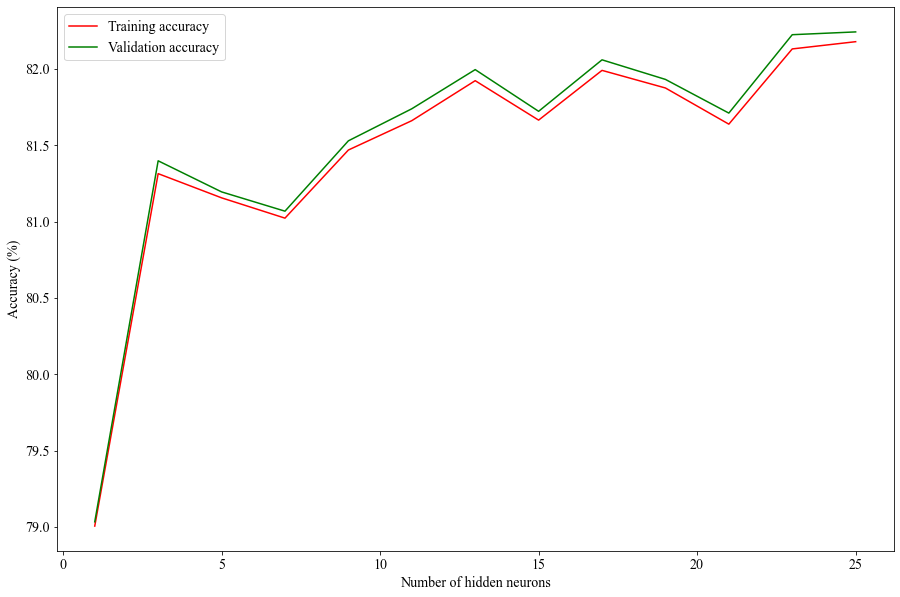

In [29]:
neuron_number=range(1,26,1)
Training_accuracy1=np.array(Training_accuracy) * 100 
Validation_accuracy1=np.array(Validation_accuracy) * 100 
plt.figure(figsize=(15,10))
TA_inter,=plt.plot(neuron_number,Training_accuracy1,label="Training accuracy",color="red")
VA_inter,=plt.plot(neuron_number,Validation_accuracy1,label="Validation accuracy",color="green")
plt.legend([TA_inter,VA_inter],['Training accuracy','Validation accuracy'],fontsize=14)
plt.xlabel("Number of hidden neurons")
plt.ylabel("Accuracy (%)")
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

In [42]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=24, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 10000, epochs = 20)

Epoch 1/20


UnimplementedError:  Cast string to float is not supported
	 [[node binary_crossentropy/Cast (defined at <ipython-input-42-d56cb2973aac>:5) ]] [Op:__inference_train_function_1141283]

Function call stack:
train_function


In [ ]:
#fitting accuracy
y_fitting_pred=ann.predict(X_fit)
y_fitting_pred=(y_fitting_pred>0.5)
print("Fitting accuracy-interstate:",accuracy_score(y_fit,y_fitting_pred)*100)

#testing accuracy
y_test_pred=ann.predict(X_test)
y_test_pred=(y_test_pred>0.5)
print("Testing accuracy-interstate:",accuracy_score(y_test,y_test_pred)*100)

In [ ]:
a=y_test.to_numpy()

In [ ]:
confusion_matrix(a.argmax(axis=1),y_test_pred.argmax(axis=1))

In [ ]:
Inter_w_dummy.columns

In [ ]:
# permutation feature importance with knn for classification
from sklearn.inspection import permutation_importance
# perform permutation importance
results_nb = permutation_importance(nb, X_fit, y_fit, scoring='accuracy')
# get importance
importance_nb = results_nb.importances_mean
# summarize feature importance
for i,v in enumerate(importance_nb):
    print('Feature: %0d, Score: %.5f' % (i,v))